In [66]:
import numpy as np
from typing import Any, Union, List, Tuple

import numpy.typing as npt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
isinstance(4.0, float)

True

In [4]:
def assert_np_shape(a, shape: Union[List, Tuple]) -> bool:
    if len(a.shape) != len(shape):
        return False

    for dim in zip(a.shape, shape):
        if isinstance(dim[1], int) is False:
            continue
        if dim[0] != dim[1]:
            return False

    return True


a = np.array([[1, 2], [3, 4]])
assert assert_np_shape(a, [2, 2])
assert assert_np_shape(a, [2, "n"])
# assert assert_np_shape(a, [2,])

# Part I

## 1.1 Linear Regression

### Q1

In [191]:
x = np.array([[i] for i in [1, 2, 3, 4]])
print(x, x.shape)

# define x as a column vector

[[1]
 [2]
 [3]
 [4]] (4, 1)


In [192]:
y = np.array([[i] for i in [3, 2, 0, 5]])
print(y, y.shape)

# define y as a column vector

[[3]
 [2]
 [0]
 [5]] (4, 1)


In [193]:
def make_linear_X_matrix(x, k: int):
    """
    make_linear_X_matrix make the X matrix of shape (m, k)

    depending on the basis function defined by k the number of columns
    of matrix will vary

    :param x: np.array of shape (m,1)
    :type x: np.array
    :param k: parameter for basis function
        k=1 {1}
        k=2 {1, x^2}
        k=3 {1, x^2, x^3}
        k=4 {1, x^2, x^3, x^4}
    :type k: int
    :return: Matrix X of shape (m,k)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 1])

    X = np.ones(shape=(x.shape[0], k))

    for col in range(k):
        X[:, col] *= np.power(x[:, 0], col)

    assert assert_np_shape(X, ["n", k])
    return X


X = make_linear_X_matrix(x, k=3)

print(X, X.shape)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]] (4, 3)


In [194]:
def write_equation(k: int, W) -> str:
    """
    write_equation write equation in proper format

    equations as a1*x + a2*x^2 + a3*x^3 ...

    :param k: (k-1) is the maximum power of x
    :type k: int
    :param W: Weight vector has the shape (k, 1)
    :type W: np.array
    :return: equation as a string
    :rtype: str
    """
    assert assert_np_shape(W, [k, 1])
    W = W[:, 0]
    equation = f"{W[0]:.02f}"

    for x_pow in range(1, k):
        if W[x_pow] < 0:
            equation += f" {W[x_pow]:.02f} x^{x_pow}"
        else:
            equation += f" +{W[x_pow]:.02f} x^{x_pow}"
    return equation

In [195]:
def calculate_MSE(orignal_y, predicted_y) -> float:
    """
    calculate_MSE Calculate mean squared error

    first calculate the Sum squared error
    then mean squared error

    :param orignal_y: orignal y vector, shape should be (n, 1)
    :type orignal_y: np.array
    :param predicted_y: predicted y vector, shape should be (n, 1)
    :type predicted_y: np.array
    :decimals: decimals to round off to while returning
    :return: return the Mean squared error rounded up to 3 decimal places
    :rtype: float
    """
    assert assert_np_shape(orignal_y, predicted_y.shape)

    SE = orignal_y - predicted_y
    SSE = np.sum(SE**2)

    MSE = SSE / np.size(orignal_y)

    return MSE


calculate_MSE(
    orignal_y=np.array([1, 1.3, 1]), predicted_y=np.array([1.2, 1.4, 1.5])
)  # return 0.1

0.09999999999999998

#### a

Plot superimposing the four different curves corresponding to each fit over the four data points.

#### b

Give the equations corresponding to the curves fitted for k = 1, 2, 3.
 
#### c

For each fitted curve k = 1, 2, 3, 4 give the mean square error MSE

In [196]:
org_pts = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=y[:, 0],
        mode="markers",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
        name="data points",
    )
)

org_pts.update_layout(title="Data points")
org_pts.show()

MSE_k = []

for k in range(1, 5):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ y

    pts_x = np.linspace(0, 6, 100, dtype=float).reshape((100, 1))
    pts_X = make_linear_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    equation = write_equation(k, W)

    X = make_linear_X_matrix(x, k=k)
    predicted_y = X @ W

    MSE_k.append(calculate_MSE(y, predicted_y))
    print(f"k={k} : ", equation)
    print(f"k={k} : MSE {MSE_k[-1]}")

    org_pts.add_trace(
        go.Scatter(
            x=pts_x[:, 0], y=pts_y[:, 0], name="k=" + str(k), hovertemplate=f"k={k}"
        )
    )


org_pts.update_layout(
    title="Fitted polynomials", yaxis_range=[-5, 8], xaxis_range=[-0, 5]
)

org_pts.show()

MSE_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 5, 1),
        y=MSE_k,
        mode="markers",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)
MSE_vs_k.update_layout(
    title="MSE vs k",
    xaxis_title="k",
    yaxis_title="MSE",
)
MSE_vs_k.show()

k=1 :  2.50
k=1 : MSE 3.25
k=2 :  1.50 +0.40 x^1
k=2 : MSE 3.05
k=3 :  9.00 -7.10 x^1 +1.50 x^2
k=3 : MSE 0.7999999999999984
k=4 :  -5.00 +15.17 x^1 -8.50 x^2 +1.33 x^3
k=4 : MSE 1.1533033153905203e-22


### Q2



we define g as
$$g_{\sigma}(x)= sin^2(2 \pi x)+ \epsilon$$

In [200]:
def g_func(x, sigma: float):
    """
    g_func= sin^2(2 pi x) + noise

    noise is given by a random variable epsilon randomly distributed
    in with mean 0 and SD sigma

    :param x: vector, shape (n,1)
    :type x: np.array
    :param sigma: standard deviation of normal distribution for noise
    :type sigma: float
    :return: vector of shape same as x, (n,1)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 1])

    epsilon = np.random.normal(loc=0.0, scale=sigma, size=x.shape)

    g = (np.sin(2 * np.pi * x) ** 2) + epsilon

    assert assert_np_shape(g, x.shape)

    return g

#### a.i

Plot the function sin2 (2πx) in the range 0 ≤ x ≤ 1 with the points of the above data set
superimposed

In [229]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)


sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

In [230]:
x_pts = np.linspace(0, 1, 100)
x_pts = x_pts.reshape((x_pts.size, 1))

g_pts = g_func(x_pts, 0.0)

sin2_points.add_trace(go.Scatter(x=x_pts[:, 0], y=g_pts[:, 0], name="g(x) w/o noise"))

sin2_points.show()

#### a.ii

Fit the data set with a polynomial bases of dimension k = 2, 5, 10, 14, 18 plot each of these
5 curves superimposed over a plot of data points

In [231]:
sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

for k in [2, 5, 10, 14, 15, 18]:
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # find W using orgnal data points

    pts_x = np.linspace(0, 1, 100, dtype=float).reshape((100, 1))
    pts_X = make_linear_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    sin2_points.add_trace(
        go.Scatter(
            x=pts_x[:, 0],
            y=pts_y[:, 0],
            name="k=" + str(k),
            hovertemplate=f"k={k}",
            mode="lines",
        )
    )
sin2_points.update_layout(yaxis_range=[-0.5, 1.5], xaxis_range=[-0.1, 1.1])
sin2_points.show()

#### b

Plot the natural log (ln) of the training error versus the polynomial dimension
k = 1, . . . , 18


In [232]:
train_err = []

for k in range(1, 19):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    predicted_y = X @ W

    train_err.append(calculate_MSE(g, predicted_y))

In [240]:
train_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(train_err),
        mode="markers+lines",
        name="Training error",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

#### c

Generate 1000 points for testing in the same way as training data. Plot the ln of the test error versus the polynomial dimension
k = 1, 2,3 . . , 18.

In [241]:
test_x = np.random.random_sample((1000, 1))
test_g = g_func(test_x, 0.07)

In [242]:
test_err = []

for k in range(1, 19):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    X = make_linear_X_matrix(test_x, k=k)

    predicted_y = X @ W

    test_err.append(calculate_MSE(test_g, predicted_y))

In [243]:
test_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(test_err),
        mode="markers+lines",
        name="Testing error",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

test_err_vs_k.show()

In [244]:
train_err_vs_k.add_trace(test_err_vs_k.data[0])
train_err_vs_k.update_layout(title="Ln(Train error) and Ln(Test error) vs K")

train_err_vs_k.show()

#### d

Pseudo code

1. Select k = {1, 2, 3..... 18}
    * Repeat 100 times
        * Generate 30 points for training
        * Calculate training error
        * Generate 1000 points for testin
        * Calculate testing error
    * Take the average of 100 training and testing errors for any given k
2. Plot Ln(avg training error) vs k
3. Plot Ln(avg testing error) vs k


In [245]:
test_err = np.zeros((100, 18), dtype=float)
train_err = np.zeros((100, 18), dtype=float)

for k in range(1, 19):
    for step in range(100):
        x = np.random.random_sample((30, 1))
        g = g_func(x, 0.07)
        X = make_linear_X_matrix(x, k=k)

        W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points
        predicted_y = X @ W

        train_err[step, k - 1] = calculate_MSE(g, predicted_y)

        test_x = np.random.random_sample((1000, 1))
        test_g = g_func(test_x, 0.07)

        X = make_linear_X_matrix(test_x, k=k)

        predicted_y = X @ W

        test_err[step, k - 1] = calculate_MSE(test_g, predicted_y)

In [246]:
train_err_avg = np.average(train_err, axis=0)
test_err_avg = np.average(test_err, axis=0)

In [248]:
train_err_vs_k = go.Figure(
    data=[
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(train_err_avg),
            mode="markers+lines",
            name="Avg Training error",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(test_err_avg),
            mode="markers+lines",
            name="Avg Testing error",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
    ]
)

train_err_vs_k.update_layout(title="Ln(Avg Train error) and Ln(Avg Test error) vs K")
train_err_vs_k.show()

### Q3

Now work with basis

$$\{sin(1 \pi x), sin(2 \pi x), sin(3\pi x),....sin(k\pi x)\}$$

In [250]:
def make_sin_X_matrix(x, k: int):
    """
    make_sin_X_matrix generate the basis function of sines

    fourier expansion

    :param x: vector of data points, shape (n,1)
    :type x: np.array
    :param k: parameter for making the basis function
    :type k: int
    :return: return the X matrix of shape (n, k)
    :rtype: np.array
    """
    assert assert_np_shape(x, ["n", 1])

    X = np.ones(shape=(x.shape[0], k))

    for col in range(k):
        X[:, col] = np.sin((col + 1) * np.pi * x[:, 0])

    assert assert_np_shape(X, [x.size, k])
    return X

In [ ]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)

In [252]:
sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

for k in [2, 5, 10, 14, 15, 18]:
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # find W using orgnal data points

    pts_x = np.linspace(0, 1, 100, dtype=float).reshape((100, 1))
    pts_X = make_sin_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    sin2_points.add_trace(
        go.Scatter(
            x=pts_x[:, 0],
            y=pts_y[:, 0],
            name="k=" + str(k),
            hovertemplate=f"k={k}",
            mode="lines",
        )
    )
sin2_points.update_layout(yaxis_range=[-0.5, 1.5], xaxis_range=[-0.1, 1.1])
sin2_points.show()

#### a

Plot the natural log (ln) of the training error versus k = 1, 2, 3 . . , 18

In [253]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)

In [254]:
train_err = []

for k in range(1, 19):
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    predicted_y = X @ W

    train_err.append(calculate_MSE(g, predicted_y))

In [256]:
train_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(train_err),
        mode="markers+lines",
        name="data point",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

#### b

Generate 1000 test points and calcuate the testing error. Plot the ln of the test error versus k= {1,2,3....18}

In [257]:
test_x = np.random.random_sample((1000, 1))
test_g = g_func(test_x, 0.07)

In [258]:
test_err = []

for k in range(1, 19):
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    X = make_sin_X_matrix(test_x, k=k)

    predicted_y = X @ W

    test_err.append(calculate_MSE(test_g, predicted_y))

In [259]:
test_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(test_err),
        mode="markers+lines",
        name="data point",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

test_err_vs_k.update_layout(title="Log(test_err) vs k")

test_err_vs_k.show()

#### c

plot the Log(average train error) and Log(avg Test error) vs K, where the average is taken per 100 runs for same k

In [260]:
test_err = np.zeros((100, 18), dtype=float)
train_err = np.zeros((100, 18), dtype=float)

for k in range(1, 19):
    for step in range(100):
        x = np.random.random_sample((30, 1))
        g = g_func(x, 0.07)
        X = make_sin_X_matrix(x, k=k)

        W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points
        predicted_y = X @ W

        train_err[step, k - 1] = calculate_MSE(g, predicted_y)

        test_x = np.random.random_sample((1000, 1))
        test_g = g_func(test_x, 0.07)

        X = make_sin_X_matrix(test_x, k=k)

        predicted_y = X @ W

        test_err[step, k - 1] = calculate_MSE(test_g, predicted_y)

In [261]:
train_err_avg = np.average(train_err, axis=0)
test_err_avg = np.average(test_err, axis=0)

In [263]:
train_err_vs_k = go.Figure(
    data=[
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(train_err_avg),
            mode="markers+lines",
            name="Log(Avg train error)",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(test_err_avg),
            mode="markers+lines",
            name="Log(Avg test error)",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
    ]
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

# Part II

## K-NN

In [774]:
def calculate_distance(x, x_test):
    """
    calculate_distance calculate the euclidaean distances for any point with respect
    to the training data

    for training data of shape (n,2) this function returns a vector (n,1) of distance
    wrt to each point.
    first dimension of x axis second of y axis

    :param x: training data points, shape (n,2)
    :type x: np.array
    :param x_test: new point wrt to which all distances need to be calculated, shape (1, 2)
    :type x_test: np.array
    :return: array of distances of every point in training set wrt to tesst point. shape (n,1)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 2])
    assert assert_np_shape(x_test, [1, 2])

    x_test = np.broadcast_to(x_test, x.shape)

    distance = (x - x_test) ** 2

    distance = np.sqrt(np.sum(distance, axis=1)).reshape((x.shape[0], 1))

    assert assert_np_shape(distance, [x.shape[0], 1])
    return distance


x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
x_check = np.array([[3, 4]])


for _ in range(5):
    print(calculate_distance(x_test_check, x_check))

[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]
[[5. ]
 [4. ]
 [3. ]
 [4.5]
 [3.5]]


In [778]:
def sort_first_k(distances, y, k: int = 3):
    """
    sort_first_k sort the first k smallest distances in a distances array of shape (n,1)

    sort only the first k to reduce time complexity. Selection sort used
    y labels are also sorted accordingly

    :param distances: array of distances, shape(n,1)
    :type distances: np.array
    :param y: array of labels, shape (n,1)
    :type y: np.array
    :param k: number of smallest distances to sort, defaults to 3
    :type k: int, optional
    :return: Tuple of 2 arrays distances and labels of shapes (n,1) and (n,1)
    :rtype: Tuple[np.array, np.array]
    """

    assert assert_np_shape(y, ["n", 1])
    assert assert_np_shape(distances, ["n", 1])

    for i, arr_i in enumerate(distances[:, 0]):
        if i == k:
            break
        smallest_num = arr_i
        smallest_i = i

        for j, arr_j in enumerate(distances[i:, 0]):
            if arr_j < smallest_num:
                smallest_num = arr_j
                smallest_i = j + i

        distances[i, 0], distances[smallest_i, 0] = (
            distances[smallest_i, 0],
            distances[i, 0],
        )
        y[i, 0], y[smallest_i, 0] = y[smallest_i, 0], y[i, 0]

    return distances, y


x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
x_check = np.array([[3, 4]])
y_check = np.array([[0], [1], [1], [0], [1]])

for _ in range(5):
    print(sort_first_k(calculate_distance(x_test_check, x_check), np.copy(y)))

(array([[3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]]), array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]]))
(array([[3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]]), array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]]))
(array([[3. ],
       [3.5],
       [4. ],
       [4.5],
       [5. ]]), array([[0],
       [0],
       [1],
       [1],
       [0

In [848]:
def knn_label(x, y, x_test, k: int = 3) -> int:
    """
    knn_label decide label based on k nearest neighbours

    _extended_summary_

    :param x: position labels as a (n,2) array
    :type x: np.array
    :param y: data labels as a (n, 1) array
    :type y: np.array
    :param x_test: labels for new points shape (1, 2)
    :type x_test: np.array
    :param k: parameter for looking the KNN algorithm, defaults to 3
    :type k: int, optional
    :return: label corresponding to the new point
    :rtype: int
    """

    distances = calculate_distance(x=x, x_test=x_test)

    distances, y2 = sort_first_k(distances=np.copy(distances), y=np.copy(y))

    count_1 = np.sum(y2[:k, 0])
    count_0 = k - count_1

    if count_0 > count_1:
        return 0
    else:
        return 1


knn_label_vec = np.vectorize(knn_label)


knn_label(
    np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]]),
    x_test=np.array([[3, 4]]),
    y=np.array([[0], [1], [1], [0], [1]]),
)

x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
x_check = np.array([[3, 4]])
y_check = np.array([[0], [1], [1], [0], [1]])

# for _ in range(20):
#     print(knn_label(x= x_test_check, y= y_check, x_test= x_check))

### Q6

In [851]:
x = np.random.random(size=(100, 2))
y = np.random.randint(0, 2, size=(100, 1))

# Define a color map for binary values of y
color_map = {0: "black", 1: "red"}

# Create a list of colors based on label values stored in y
colors = [color_map[val] for val in y[:, 0]]

In [852]:
# Create a scatter plot
data_points = go.Figure(
    go.Scatter(
        x=x[:, 0],
        y=x[:, 1],
        mode="markers",
        marker=dict(color=colors),
        showlegend=False,
        hovertemplate="<b>x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br><extra></extra>",
    )
)

data_points.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode="markers",
        marker=dict(color="red"),
        name="Label=1",  # Legend item for red color (label 1)
        showlegend=True,
    )
)

data_points.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode="markers",
        marker=dict(color="black"),
        name="Label=0",  # Legend item for red color (label 1)
        showlegend=True,
    )
)


# Create the layout
data_points.update_layout(
    title="|S|= 100",
    xaxis=dict(title="x_1"),
    yaxis=dict(title="x_2"),
    autosize=False,
    width=800,
    height=800,
)

# Create the figure and add the scatter trace

# Show the plot
data_points.show()

In [863]:
all_pts_x = np.linspace(0.0, 1.0, 200)
all_pts_y = np.linspace(0.0, 1.0, 200)

all_pts = np.meshgrid(all_pts_x, all_pts_y)

x_coords = all_pts[0].flatten().reshape(all_pts[1].size, 1)
y_coords = all_pts[1].flatten().reshape(all_pts[0].size, 1)

mesh_coords = np.concatenate((x_coords, y_coords), axis=1)


mesh_vals = np.zeros((mesh_coords.shape[0], 1))

for i, test_pt in enumerate(mesh_coords):
    mesh_vals[i, 0] = knn_label(
        x=np.copy(x), y=np.copy(y), x_test=test_pt.reshape(1, 2)
    )

In [867]:
data_points2 = go.Figure(data_points)

# Create the layout
data_points2.update_layout(
    title="|S|= 100", xaxis=dict(title="x_1"), yaxis=dict(title="x_2")
)


colors = [color_map[val] for val in mesh_vals[:, 0]]


data_points2.add_trace(
    go.Heatmap(
        x=mesh_coords[:, 0],
        y=mesh_coords[:, 1],
        z=mesh_vals[:, 0],
        colorscale="Viridis",
        customdata=mesh_vals,
        showscale=False,
        hovertemplate="x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br>%{customdata}<br><extra></extra>",
    )
)


data_points2.show()

del data_points2

### Q6 comparison with sklearn

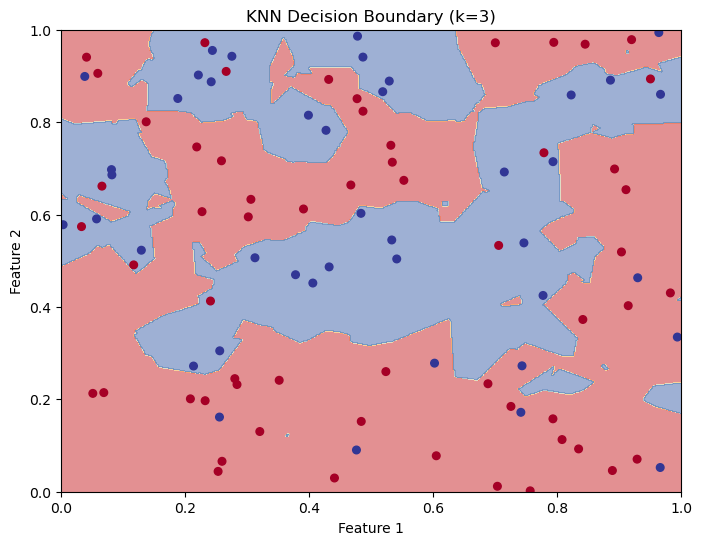

In [862]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x, y[:, 0])


xx, yy = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0, 1, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for the grid points
Z = knn_classifier.predict(grid_points)

# Reshape the predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap=plt.cm.RdYlBu, s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()

In [773]:
knn_label(x=np.copy(x), y=np.copy(y), x_test=np.array([[0.3, 0.7]]))

0

In [381]:
mesh_points = go.Figure(
    go.Scatter(
        x=mesh_coords[:, 0],
        y=mesh_coords[:, 1],
        mode="markers",
        marker=dict(color=colors),
        hovertemplate="<b>x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br><extra></extra>",
    )
)

mesh_points.show()

AssertionError: 

In [89]:
a = 12

In [90]:
b = 23

In [91]:
c = 34

In [92]:
d = 34

In [93]:
e = 23

In [94]:
f = 23

In [15]:
from nptyping import NDArray, Int, Shape


def test(a: NDArray[Shape["2, 2"], Int]):
    print(a)


test(np.array([1, 1, 2, 3.8, 3]))

[1.  1.  2.  3.8 3. ]


In [18]:
isinstance(np.array([[1, 2], [3, 4]]), NDArray[Shape["2, 2"], Int])

True